<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/YB_1114_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [28]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [31]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True


In [32]:
# 전복 고리 수
y

array([15,  7,  9, ...,  9, 10, 12])

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [33]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [34]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [35]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [36]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)  # alpha = 규제 강도 설정 / 값이 클수록 가중치(계수) 더 줄임
ridge.fit(X_train, y_train)

#예측값 구하기
ridge_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
# 전복 실제 나이 = 고리 수 + 1.5
ridge_age = ridge_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)  # 예측이 실제 값과 얼마나 차이가 나는지 직관적 파악 가능

print(f'MSE : {mse:.3f}')
print(f'RMSE : {rmse:.3f}')

MSE : 4.835
RMSE : 2.199


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [37]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [38]:
ridge.coef_

array([  1.04695751,   9.74151379,   8.4139776 ,   7.81607599,
       -18.83259112,  -7.95403162,   9.54803448,   0.34954615,
         0.21573156,  -0.56527771])

- 릿지 모델의 회귀 계수는 각 입력 변수(길이, 직경, 높이, 무게, 성별)가 전복의 고리 수에 미치는 영향의 방향(양수/음수)과 상대적인 크기를 나타냄
- 계수가 양수인 변수는 값이 증가할수록 고리 수가 증가하는 경향을, 음수인 변수는 고리 수가 감소하는 경향을 의미
- 절댓값이 클수록 그 변수가 전복의 나이에 더 큰 영향을 미친다고 볼 수 있음
- 따라서 전복의 크기와 무게가 클수록 나이가 많아지는지, 성별에 따라 평균 나이가 어떻게 다른지 등을 파악할 수 있으며, 릿지 회귀 특성상 다중공선성을 완화한 상태에서 변수들의 상대적 중요도 해석 가능

- 실제 계수 값을 보면, Whole weight와 Shell weight의 계수가 다른 변수보다 크고 양수이므로, 전복의 전체 무게와 껍데기 무게가 클수록 고리 수(나이)가 증가하는 경향이 강한 것으로 보임
- 반면 Shucked weight의 계수는 음수로 나타나, 다른 조건이 같을 때 살 무게가 큰 개체는 상대적으로 고리 수가 적을 수 있음을 시사
- 또한 성별 더미 변수 중 I(infant)의 계수가 음수인 것은, infant가 M, F에 비해 평균적으로 고리 수가 적다는 점과 일치

3-4) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [39]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [40]:
# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_predict = ridge.predict(X_test)
    mse = mean_squared_error(y_test, ridge_predict)
    rmse = np.sqrt(mse)
    print(alpha, rmse)

# cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))  # cross_val_score는 값이 클수록 좋은 방향

print(avg_rmse)

0 2.198454604491696
0.1 2.1977141159000886
1 2.2065343128001853
10 2.3217382290823125
100 2.5785934876281473
2.621188059927813


In [41]:
neg_mse_scores

array([-14.76006635,  -4.02631472,  -7.71889931,  -4.97361093,
        -5.05817693])

0.1일 때 가장 성능이 좋음

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [42]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor, plot_importance

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [43]:
# 모델 생성 및 훈련
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# 예측값 구하기
xgb_predict = xgb.predict(X_test)

# 구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_age = xgb_predict + 1.5

# MSE와 RMSE 구하기
mse = mean_squared_error(y_test, xgb_predict)
rmse = np.sqrt(mse)
print(mse, rmse)

5.281002521514893 2.2980431940054764


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

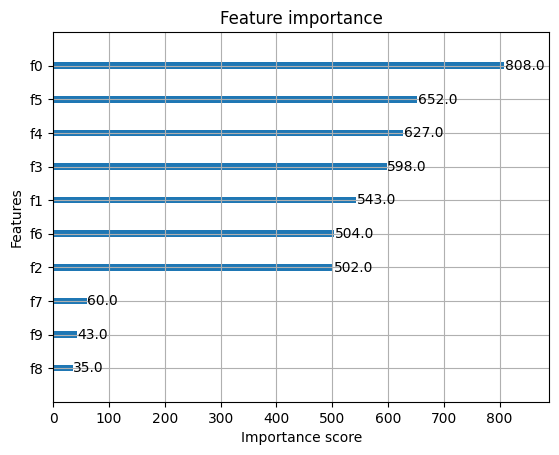

In [44]:
import seaborn as sns
%matplotlib inline

plot_importance(xgb)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [45]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [46]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [47]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [49]:
# 기울기
lr.coef_

array([[-1.99751338e-01,  3.65451144e-01,  1.49472353e-01,
        -1.88027194e-01, -2.28494592e-02,  1.95456785e-01,
         4.66701970e-01, -1.66796877e-02,  8.23898405e-02,
         6.75013134e-02, -1.92622072e-02,  2.94916201e-01,
         7.42522347e-03],
       [ 5.96476523e-01, -7.88673910e-01, -1.26181652e-01,
         2.12254429e-01, -1.13504086e-02,  3.15786394e-01,
         3.55148523e-01,  3.34675938e-02,  2.79036084e-01,
        -1.17202662e+00,  2.61166065e-01,  4.64732238e-01,
        -8.33633769e-03],
       [-3.96725185e-01,  4.23222765e-01, -2.32907005e-02,
        -2.42272356e-02,  3.41998678e-02, -5.11243179e-01,
        -8.21850494e-01, -1.67879061e-02, -3.61425924e-01,
         1.10452531e+00, -2.41903857e-01, -7.59648438e-01,
         9.11114220e-04]])

In [50]:
# 절편
lr.intercept_

array([-0.04177842,  0.09551058, -0.05373216])

3-3) 모델의 정확도를 구하세요.

In [51]:
# 모델의 예측값 구하기
from sklearn.metrics import accuracy_score
lr_predict = lr.predict(x_test)

# 모델의 정확도 구하기
accuracy = accuracy_score(y_test, lr_predict)
accuracy

0.9629629629629629